In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1), df['diagnosis'], test_size=0.30, random_state=101)

In [6]:
from sklearn.svm import SVC
SV_model = SVC()
SV_model.fit(X_train,y_train)

SVC()

In [7]:
predictions = SV_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[102   3]
 [ 10  56]]


              precision    recall  f1-score   support

           B       0.91      0.97      0.94       105
           M       0.95      0.85      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [8]:
parameters_grid = {'C': [0.01,0.1,1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
SV_grid = GridSearchCV(SVC(),parameters_grid,refit=True,verbose=3)
SV_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf

[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.937 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.975 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.949 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.949 total time=   0.0s
[CV 1/5] END .......C=100, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .......C=100, g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [9]:
SV_grid.best_params_
SV_grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [10]:
grid_predictions = SV_grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[101   4]
 [  7  59]]


              precision    recall  f1-score   support

           B       0.94      0.96      0.95       105
           M       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis',axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('diagnosis',axis=1))
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [13]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features,df['diagnosis'],
                                                    test_size=0.30, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train1,y_train1)
KNN_predictions = KNN_model.predict(X_test1)

print(confusion_matrix(y_test1,KNN_predictions))
print('\n')
print(classification_report(y_test1,KNN_predictions))

[[102   3]
 [  5  61]]


              precision    recall  f1-score   support

           B       0.95      0.97      0.96       105
           M       0.95      0.92      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [15]:
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train1,y_train1)
    pred_i = KNN_model.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test1))

Text(0, 0.5, 'Error Rate')

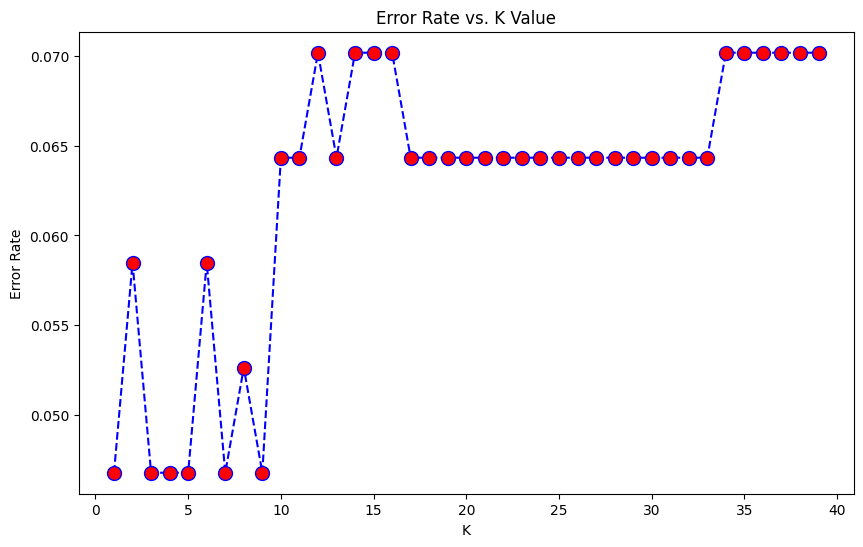

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [17]:
KNN_model = KNeighborsClassifier(n_neighbors=3)

KNN_model.fit(X_train1,y_train1)
KNN_predictions = KNN_model.predict(X_test1)

print(confusion_matrix(y_test1,KNN_predictions))
print('\n')
print(classification_report(y_test1,KNN_predictions))

[[104   1]
 [  7  59]]


              precision    recall  f1-score   support

           B       0.94      0.99      0.96       105
           M       0.98      0.89      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

